# Classification system


## **Import Necessary Modules**

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
pip install biopython

     |████████████████████████████████| 2.3 MB 5.2 MB/s 


In [ ]:
import os
import keras
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
from Bio import SeqIO  
import pandas as pd
from keras.utils import np_utils
import matplotlib.pyplot as plt
from random import shuffle
%matplotlib inline
from sklearn.cluster import KMeans
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout, Embedding, LSTM
from keras import regularizers, layers, preprocessing
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import pandas as pd
import tensorflow as tf
from sklearn.utils import shuffle

# **Main model with 3 classes**

The first step is to generate the CSV with the three different classes in it


In [ ]:
main_csv=open('ADD_YOUR_PATH', 'w')
og=[]
rep=[]
main_csv.write('function,genes' + '\n') #We write the header for the CSV  
CSVs=os.listdir('ADD_YOUR_PATH') #To search every CSV in the same directory
for csv in CSVs:
  data=pd.read_csv('ADD_YOUR_PATH'+csv)
  for index,row in data.iterrows():
    row['resistant']=csv.split('.')[0]#We separate each column from the CSVs
    if row['genes'] not in og:
      main_csv.write(str(row['resistant']) +','+ str(row['genes']) +'\n')#We write both new columns in the new CSV
      og.append(row['genes'])
    else:
      rep.append(row['genes'])
main_csv.close()

In [ ]:
def cnn():
  model = Sequential()
  model.add(Embedding(64, 3, input_length=maxlen))
  model.add(layers.Conv1D(128, 243, activation='relu'))
  model.add(layers.MaxPooling1D(3))
  model.add(layers.Dropout(0.5))
  model.add(layers.Conv1D(128, 81, activation='relu'))
  model.add(layers.Dropout(0.5))
  model.add(layers.Conv1D(128, 27, activation='relu'))
  model.add(layers.MaxPooling1D(3))
  model.add(layers.Dropout(0.5))
  model.add(layers.Conv1D(128, 9, activation='relu'))
  model.add(layers.MaxPooling1D(3))
  model.add(layers.Dropout(0.5))
  model.add(layers.Bidirectional(layers.GRU(32, dropout=0.2, recurrent_dropout=0.5)))
  model.add(Dense(3, activation='softmax'))
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
  model.summary()
  return(model)

In [ ]:
DataFrame=pd.read_csv('ADD_YOUR_PATH') #Here you insert the path of the CSV with all the information
DataFrame=shuffle(DataFrame) #We shuffle the data
# Tokenize from characters to integers (sequences and then pad / truncate data)
DataCod = DataFrame.copy()
Codons = list(DataCod['genes']) #Here we select only the sequences, wihtout the label
length = []
for n in range(len(Codons)):
    Codons[n] = list([Codons[n][i:i+3] for i in range(0, len(Codons[n]), 3)])
    length.append(len(Codons[n])) #We calculate the length of each sequence in codons
    
DataCod['codons'] = Codons
# Tokenize from codons to integers (sequences and then pad / truncate data)

maxlen = max(length) # cut off after this number of codons in a list
max_words = 64 # Number of words in the dictionary, equal to the number of  possible codons
max_features = max_words
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(list(DataCod['codons']))
sequences = tokenizer.texts_to_sequences(list(DataCod['codons']))
word_index = tokenizer.word_index
Xpad = pad_sequences(sequences, maxlen=maxlen, padding='post', truncating='post', value=0)

# This step ensures that the generated dictionary has exactly what we asked for since in some cases words that are not codons are generated
new_dict= {'cac', 'cgt', 'aat', 'atg', 'tac', 'att', 'tgg', 'gac', 'tgc', 'act', 'gtt', 'gaa', 'aaa', 'cag', 'tga', 'ttg', 'gct', 'ttc', 'tct', 'ggc', 'aca', 'taa', 'ctg', 'ata', 'caa', 'ctt', 'tcg', 'gtc', 'aac', 'gga', 'acg', 'gca', 'tta', 'cta', 'acc', 'gat', 'tca', 'tat', 'agg', 'tgt', 'gtg', 'cga', 'cgc', 'ttt', 'aga', 'ggt', 'ctc', 'cca', 'ccg', 'gcg', 'a', 'ga', 'tag', 'atc', 'cat', 'agt', 'cgg', 'aag', 'gag', 'cct', 'gta', 'ggg', 'tcc', 'agc', 'ccc', 'gcc'}
unwanted= set(word_index) - set(new_dict)
for unwanted_key in unwanted: del word_index[unwanted_key]


# Separate the label
labels = np.asarray(DataCod['function'])

training_samples = int(Xpad.shape[0] * 0.8) # This number will be used to separate between train set (80% of data) and test set (20% of data)


indices = np.arange(Xpad.shape[0])
np.random.shuffle(indices) 

Xpad = Xpad[indices]
labels = labels[indices]

print(len(labels))
print(len(Xpad))
x_train = np.asarray(Xpad[:training_samples])
y_train = np.asarray(labels[:training_samples])
x_test = np.asarray(Xpad[training_samples:])
y_test = np.asarray(labels[training_samples:])

#Labels are encoded as an an array of zeroes and ones 
encoder=LabelEncoder()
encoder.fit(y_train)
encoded_Y=encoder.transform(y_train)

encoder1=LabelEncoder()
encoder1.fit(y_test)
encoded_Y1=encoder1.transform(y_test)
y_train=np_utils.to_categorical(encoded_Y)
y_test=np_utils.to_categorical(encoded_Y1)

print('x_train', x_train.shape)
print('y_train', y_train.shape)
print('x_test', x_test.shape)
print('y_test', y_test.shape)
model = cnn()

## **Fit and save the model**
Paths must be changed

In [ ]:
gym = model.fit(x_train, y_train, epochs = 15, batch_size=64, validation_split=0.2)
model.save('PATH-TO-SAVE-MODEL/FOLDER-NAME')

# **Metrics calculation and predictions**
With this cell you can input the path of the saved model and look at the confusion matrix and classification report.

Credit for the function for plotting the matrix in a beatiful manner and the probability treshold decision to: 
https://www.kaggle.com/drscarlat/predict-antibiotic-resistance-w-gene-sequence/

54/54 [==============================] - 12s 208ms/step - loss: 0.2029 - acc: 0.9424
Metrics Report: 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       464
           1       0.99      0.93      0.95       962
           2       0.79      0.92      0.85       292

   micro avg       0.94      0.94      0.94      1718
   macro avg       0.92      0.94      0.93      1718
weighted avg       0.95      0.94      0.94      1718
 samples avg       0.94      0.94      0.94      1718



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 432x288 with 0 Axes>

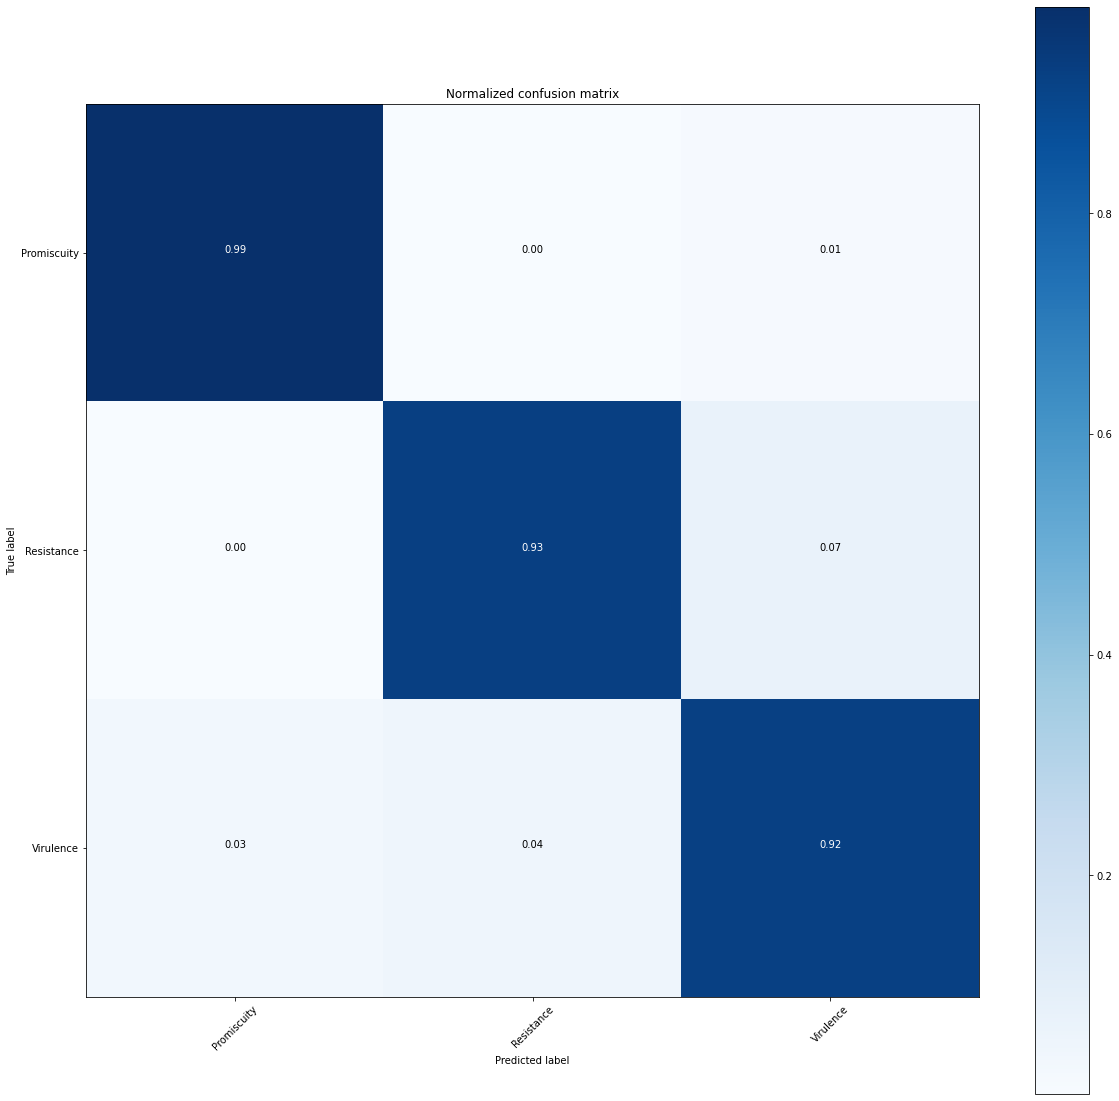

In [ ]:
model = keras.models.load_model('ADD_YOUR_PATH')
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
def separate_metrics(matrix,cyst):
  TP=matrix[cyst][cyst]
  FN=sum(matrix[cyst,:])-TP
  FP=sum(matrix[:,cyst])-TP
  TN=sum(sum(matrix))-TP-FP-FN
  return TP,FP,TN,FN
  
final_predictions = model.predict(x_test)#We use keras to predict the mechanisms of the test set, the predicitons are arrays of 3 positions with the probability to belong to each label
evaluate=model.evaluate(x_test,y_test)# We can obtain the metrics for accuracy in the test set in a direct manner by putting the labels
# An important step is to transform the probabilities to binary decisions (either you belong to a label or not), we used the typical treshold in literature of 0.5
Preds = final_predictions.copy()
Preds[ np.where( Preds >= 0.5 ) ] = 1
Preds[ np.where( Preds < 0.5 ) ] = 0

print('Metrics Report: ')
conf_mx = classification_report(y_test, Preds)
print(conf_mx)

y_pred = [np.argmax(probas) for probas in final_predictions]
y_test_int = np.argmax(y_test, axis=1)

class_names = ['Essential','Promiscuity','Resistance','Virulence']

from sklearn.metrics import confusion_matrix
import itertools
#Function to plot a generated confusion matrix from Alexander Scarlat, you can select the colormap, light or dark theme and the figure size
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(20,20))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
  
    
# compute confusion matrix
cnf_matrix = confusion_matrix(y_test_int, y_pred)
np.set_printoptions(precision=2)

# plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Normalized confusion matrix')
plt.show()


In [ ]:
#Useful to count the number of sequences labelled as each one of the classes
resistance = []
virulence = []
promiscuity = []


for i in range(len(Preds)):
  if Preds[i][2] == 1:
    virulence.append(Xpad[i])
  if Preds[i][1] == 1:
    resistance.append(Xpad[i])
  if Preds[i][0] == 1:
    promiscuity.append(Xpad[i])


print('Number of resistance sequences found: ' + str(len(resistance)))
print('Number of virulence sequences found: ' + str(len(virulence)))
print('Number of promiscuity sequences found: ' + str(len(promiscuity)))

# **Main model with 4 classes**

In [ ]:
def assemble_sequence(fil):
    files= open(fil)
    fasta_sequences = SeqIO.parse(files,'fasta')
    name=[]
    name1=[]
    sequence=[]
    for fasta in fasta_sequences:
        name.append(fasta.id)
        sequence.append(str(fasta.seq).lower())
    files.close()
    return [name,sequence]
    
path='ADD_YOUR_PATH'
dd=assemble_sequence(path)

In [ ]:
False_class=open('ADD_YOUR_PATH','w')# Here we construct the 'Essential' CSV for sequences
# not belonging to the other 3 classes (Resistance, Virulence, Promiscuity)
False_class.write('resistant,genes'+'\n')
count=0
for i in dd[1]:
  if count<=3000:
    False_class.write('False,'+ i  + '\n')
    count+=1
False_class.close()

In [ ]:
main_csv=open('ADD_YOUR_PATH', 'w')
og=[]
rep=[]
main_csv.write('function,genes' + '\n') #We write the header for the CSV  
CSVs=os.listdir('ADD_YOUR_PATH') #To search every CSV in the same directory
for csv in CSVs:
  data=pd.read_csv('ADD_YOUR_PATH'+csv)
  for index,row in data.iterrows():
    row['resistant']=csv.split('.')[0]#We separate each column from the CSVs
    if row['genes'] not in og:
      main_csv.write(str(row['resistant']) +','+ str(row['genes']) +'\n')#We write both new columns in the new CSV
      og.append(row['genes'])
    else:
      rep.append(row['genes'])
main_csv.close()

In [ ]:
def cnn():
  model = Sequential()
  model.add(Embedding(64, 4, input_length=maxlen))
  model.add(layers.Conv1D(128, 243, activation='relu'))
  model.add(layers.MaxPooling1D(3))
  model.add(layers.Dropout(0.5))
  model.add(layers.Conv1D(128, 81, activation='relu'))
  model.add(layers.Dropout(0.5))
  model.add(layers.Conv1D(128, 27, activation='relu'))
  model.add(layers.MaxPooling1D(3))
  model.add(layers.Dropout(0.5))
  model.add(layers.Conv1D(128, 9, activation='relu'))
  model.add(layers.MaxPooling1D(3))
  model.add(layers.Dropout(0.5))
  model.add(layers.Bidirectional(layers.GRU(32, dropout=0.2, recurrent_dropout=0.5)))
  model.add(Dense(4, activation='softmax'))
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
  model.summary()
  return(model)

In [ ]:
DataFrame=pd.read_csv('ADD_YOUR_PATH') #Here you insert the path of the CSV with all the information
DataFrame=shuffle(DataFrame) #We shuffle the data
# Tokenize from characters to integers (sequences and then pad / truncate data)
DataCod = DataFrame.copy()
Codons = list(DataCod['genes']) #Here we select only the sequences, wihtout the label
length = []
for n in range(len(Codons)):
    Codons[n] = list([Codons[n][i:i+3] for i in range(0, len(Codons[n]), 3)])
    length.append(len(Codons[n])) #We calculate the length of each sequence in codons
    
DataCod['codons'] = Codons
# Tokenize from codons to integers (sequences and then pad / truncate data)

maxlen = max(length) # cut off after this number of codons in a list
max_words = 64 # Number of words in the dictionary, equal to the number of  possible codons
max_features = max_words
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(list(DataCod['codons']))
sequences = tokenizer.texts_to_sequences(list(DataCod['codons']))
word_index = tokenizer.word_index
Xpad = pad_sequences(sequences, maxlen=maxlen, padding='post', truncating='post', value=0)

# This step ensures that the generated dictionary has exactly what we asked for since in some cases words that are not codons are generated
new_dict= {'cac', 'cgt', 'aat', 'atg', 'tac', 'att', 'tgg', 'gac', 'tgc', 'act', 'gtt', 'gaa', 'aaa', 'cag', 'tga', 'ttg', 'gct', 'ttc', 'tct', 'ggc', 'aca', 'taa', 'ctg', 'ata', 'caa', 'ctt', 'tcg', 'gtc', 'aac', 'gga', 'acg', 'gca', 'tta', 'cta', 'acc', 'gat', 'tca', 'tat', 'agg', 'tgt', 'gtg', 'cga', 'cgc', 'ttt', 'aga', 'ggt', 'ctc', 'cca', 'ccg', 'gcg', 'a', 'ga', 'tag', 'atc', 'cat', 'agt', 'cgg', 'aag', 'gag', 'cct', 'gta', 'ggg', 'tcc', 'agc', 'ccc', 'gcc'}
unwanted= set(word_index) - set(new_dict)
for unwanted_key in unwanted: del word_index[unwanted_key]


# Separate the label
labels = np.asarray(DataCod['function'])

training_samples = int(Xpad.shape[0] * 0.8) # This number will be used to separate between train set (80% of data) and test set (20% of data)


indices = np.arange(Xpad.shape[0])
np.random.shuffle(indices) 

Xpad = Xpad[indices]
labels = labels[indices]

print(len(labels))
print(len(Xpad))
x_train = np.asarray(Xpad[:training_samples])
y_train = np.asarray(labels[:training_samples])
x_test = np.asarray(Xpad[training_samples:])
y_test = np.asarray(labels[training_samples:])

#Labels are encoded as an an array of zeroes and ones 
encoder=LabelEncoder()
encoder.fit(y_train)
encoded_Y=encoder.transform(y_train)

encoder1=LabelEncoder()
encoder1.fit(y_test)
encoded_Y1=encoder1.transform(y_test)
y_train=np_utils.to_categorical(encoded_Y)
y_test=np_utils.to_categorical(encoded_Y1)

print('x_train', x_train.shape)
print('y_train', y_train.shape)
print('x_test', x_test.shape)
print('y_test', y_test.shape)
model = cnn()

11553
11553
x_train (9242, 7680)
y_train (9242, 4)
x_test (2311, 7680)
y_test (2311, 4)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 7680, 4)           256       
_________________________________________________________________
conv1d (Conv1D)              (None, 7438, 128)         124544    
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 2479, 128)         0         
_________________________________________________________________
dropout (Dropout)            (None, 2479, 128)         0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 2399, 128)         1327232   
_________________________________________________________________
dropout_1 (Dropout)          (None, 2399, 128)         0         
__________________________________

In [ ]:
gym = model.fit(x_train, y_train, epochs = 15, batch_size=64, validation_split=0.2)
model.save('ADD_YOUR_PATH')

73/73 [==============================] - 17s 226ms/step - loss: 0.3994 - acc: 0.8819
Metrics Report: 
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       601
           1       0.94      0.98      0.96       459
           2       0.93      0.96      0.94       953
           3       0.66      0.52      0.58       298

   micro avg       0.89      0.88      0.88      2311
   macro avg       0.85      0.83      0.84      2311
weighted avg       0.88      0.88      0.88      2311
 samples avg       0.88      0.88      0.88      2311



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 432x288 with 0 Axes>

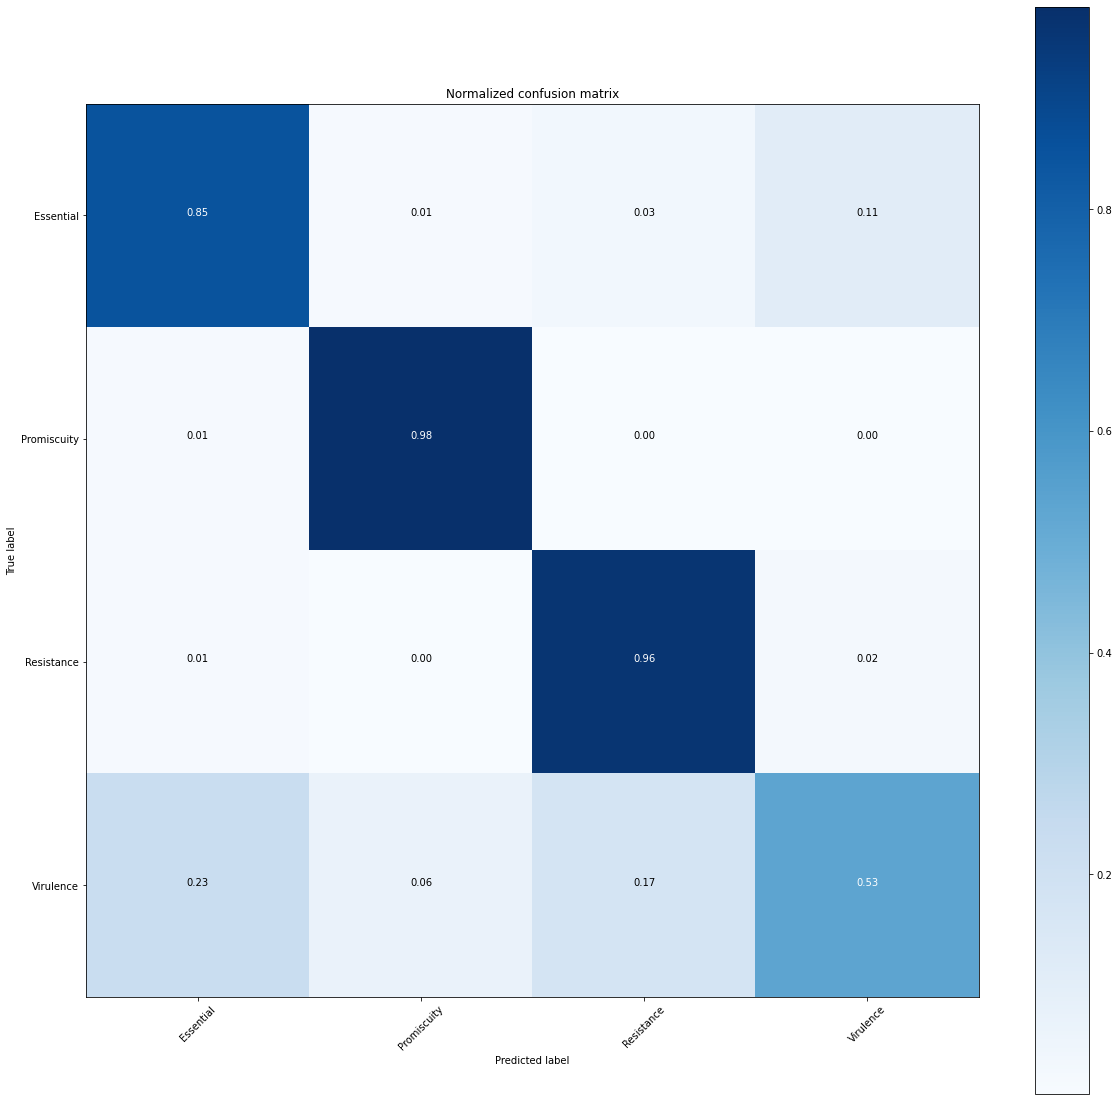

In [ ]:
model = keras.models.load_model('ADD_YOUR_PATH')
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
def separate_metrics(matrix,cyst):
  TP=matrix[cyst][cyst]
  FN=sum(matrix[cyst,:])-TP
  FP=sum(matrix[:,cyst])-TP
  TN=sum(sum(matrix))-TP-FP-FN
  return TP,FP,TN,FN
  
final_predictions = model.predict(x_test)#We use keras to predict the mechanisms of the test set, the predicitons are arrays of 3 positions with the probability to belong to each label
evaluate=model.evaluate(x_test,y_test)# We can obtain the metrics for accuracy in the test set in a direct manner by putting the labels
# An important step is to transform the probabilities to binary decisions (either you belong to a label or not), we used the typical treshold in literature of 0.5
Preds = final_predictions.copy()
Preds[ np.where( Preds >= 0.5 ) ] = 1
Preds[ np.where( Preds < 0.5 ) ] = 0

print('Metrics Report: ')
conf_mx = classification_report(y_test, Preds)
print(conf_mx)

y_pred = [np.argmax(probas) for probas in final_predictions]
y_test_int = np.argmax(y_test, axis=1)

class_names = ['Essential','Promiscuity','Resistance','Virulence']

from sklearn.metrics import confusion_matrix
import itertools
#Function to plot a generated confusion matrix from Alexander Scarlat, you can select the colormap, light or dark theme and the figure size
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(20,20))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
  
    
# compute confusion matrix
cnf_matrix = confusion_matrix(y_test_int, y_pred)
np.set_printoptions(precision=2)

# plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Normalized confusion matrix')
plt.show()
